In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# More "not interesting" words:
ADDITIONAL_STOPWORDS = ["im", "know", "dont", "will", "got", "now", "nan", "ive", "whats", "hes", 
                        "shes", "its", "cant", "mr", "mrs", "ill", "let", "lets", "youre", "one",
                        "thats", "theres", "ye", "go", "day", "say", "didnt", "wont", "aw", "uh","ah","two",
                        "isnt","ol", "youll","yes", "well", "us", "see", "hey", "ho", "look","call", "gonna", "youve",
                        "us", "take"]


In [2]:
# There are a lot of characters who appeared on the show:
df_char_index = pd.read_csv("../data/simpsons_characters.csv")
print("Nb. of distinct characters: %d " % df_char_index.shape[0])


    

Nb. of distinct characters: 6722 


In [22]:
df_char_index[df_char_index['normalized_name'].str.contains("homer")]

,id,name,normalized_name,gender
61,99,Homer-ish Husband,homer-ish husband,NaN
67,106,Homer's Image,homers image,NaN
111,125,Homer's Canyon Echo,homers canyon echo,NaN
355,380,Homer The Thief,homer the thief,NaN
547,563,HOMER (CONT'D,homer contd,NaN
600,625,Homer-Ape,homer-ape,NaN
815,840,HOMER'S THOUGHT,homers thought,NaN
894,918,Homer,homer,NaN
936,966,Homer's Spirit,homers spirit,NaN
965,989,Homer's Thought Bubble,homers thought bubble,NaN


In [4]:
#So let's extract a subset of handpicked characters from this index:
custom_char_index = {"Maggie": 105, "Marge": 1, "Bart": 8, "Lisa": 9, "Moe": 17,  "Seymour": 3,
                     "Ned": 11, "Grampa": 31, "Wiggum": 71, "Milhouse": 25, "Smithers": 14,
                     "Nelson": 101, "Edna": 40, "Selma": 22, "Barney": 18, "Patty": 10, "Martin": 38,
                     "Todd": 5, "Rod": 121, "Homer": 2, "Cletus": 1413, "Gil": 2369,
                     "Moleman": 963, "Duffman": 2277, "Apu": 208, "Burns": 15, "Dr. Nick": 349,
                     "Dr. Hibbert": 332, "Sideshow Bob": 153,"Krusty": 139, "Fat Tony": 568, "Snake": 518,
                     "Ralph": 119, "The Yes Guy": 4078}
#Next, we load the script lines into a DataFrame:
data_script_lines = pd.read_csv("../data/simpsons_script_lines.csv",
                    error_bad_lines=False,
                    warn_bad_lines=False,
                    low_memory=False)


In [5]:
#The following function processes the lines of a given character and turns them into a beautiful wordcloud:
def draw_wc(character, data, add_stopwds):
    """
    Draw a nice wordcloud representing the most frequent words for a given character.
    
    Parameters
    ----------
    character (str): the character name (must be a key from custom_char_index)
    data (DataFrame): the script lines data
    add_stopwds (list): additional stopwords for pre-processing
    
    Returns
    -------
    wc (WordCloud)
    
    """
    # Get all the lines from the character of interest:
    chosen_char_id = custom_char_index[character]
    df_charac = data[data["character_id"]==str(chosen_char_id)]
    charac_lines = list(df_charac["normalized_text"].values.astype(str))
    # Transform into one big string:
    charac_lines_one_str = ' '.join(charac_lines)
    # Build the stopwords set:
    stopwords = set(STOPWORDS)
    for w in add_stopwds:
        stopwords.add(w)
    # Instanciate the Wordcloud object:
    wc = WordCloud(background_color="black",
                   max_words=200,
                   stopwords=stopwords,
                   relative_scaling=0.5,
                   width=500,
                   height=350)
    # Generate the wordcloud using the big string:
    wc.generate(charac_lines_one_str)
    return wc

In [13]:

#Let's also write a small helper function for plotting the wordcloud:
def plot_wordcloud(character):
    char_wc = draw_wc(character, data_script_lines, ADDITIONAL_STOPWORDS)
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(char_wc)
    plt.title(character, fontsize=32)
    plt.axis("off")

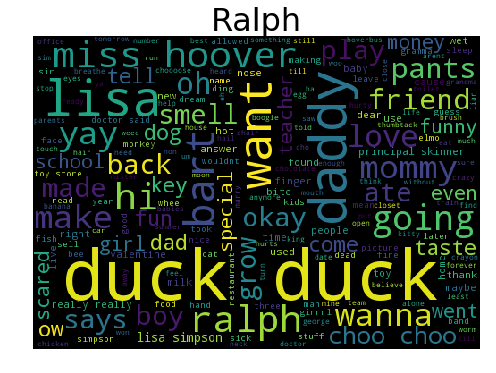

In [16]:
plot_wordcloud("Ralph")